<a href="https://colab.research.google.com/github/macodebcn/datascience_samples/blob/main/%234_scikit_learn%20%26%20more.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# montamos el disco para tener acceso a Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Respuesta

# importamos pandas
# creamos la variable <cars> y recuperamos el contenido del conjunto de datos

import pandas as pd

cars = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/prog_datasci_6/data/cars_data.csv")

# imprimimos las 5 primeras filas del conjunto de datos
# habitualmente solemos omitir el "n=", pero lo mantenemos siguiendo las
# indicaciones en la documentación de Python:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html#:~:text=DataFrame.head(,%23

print(cars.head(n=5))

# utilizamos <shape> para ver qué dimensión tienen los datos
print(cars.shape)

# por último, imprimimos los nombres de las columnas
print(cars.columns)

  new&used                                  name  money  \
0      New               2023 Acura Integra Base  33095   
1      New                 2023 Acura Mdx A-Spec  61745   
2      New  2023 Acura Integra A-Spec Technology  38095   
3      New                 2023 Acura Tlx A-Spec  47995   
4      New                 2023 Acura Tlx A-Spec  47995   

             Exterior color Interior color Drivetrain     MPG Fuel type  \
0   Liquid Carbon Metallic          Ebony         Fwd   30–37  Gasoline   
1     Majestic Black Pearl          Ebony         Awd   19–25  Gasoline   
2     Majestic Black Pearl          Ebony         Fwd   26–36  Gasoline   
3     Majestic Black Pearl          Ebony         Fwd   22–30  Gasoline   
4     Platinum White Pearl            Red         Fwd   22–30  Gasoline   

         Transmission                      Engine  ...  \
0       Automatic Cvt  1.5L I4 16V Gdi Dohc Turbo  ...   
1  10-Speed Automatic        3.5L V6 24V Gdi Sohc  ...   
2      6-Speed Manua

b) Proporciona la siguiente información :
- El número de valores no nulos presentes en cada columna y tipo de datos para cada columna
- Genera un resumen estadístico de las variables numéricas del dataset.
- Muestra la media de cada columna numérica por año.
- Crea un nuevo data frame a partir del dataset proporcionado, utilizando solamente las variables numéricas, excluyendo las demás. Y muestra las 3 primeras filas.

__Nota:__ Los resultados estadísticos deben mostrarse solamente con dos decimales.

 <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 2px; ">NM</span>

In [ ]:
# Respuesta

# creamos una variable por si más adelante la necesitamos
# obtendremos con <count> el número de valores para <cars> no nulos

no_nulo = cars.count()
print(no_nulo)

print()

types = cars.dtypes
print("Estos son los tipos de datos de las columnas:\n")
print(types)

print()

# generamos ahora un resumen estadístico, lo más usual es utilizar <describe>
# naturalmente, obtendremos datos de las columnas con datos numéricos

print(cars.describe())

print()

# para ver la media de cada columna numérica por año lo haremos como ya lo hemos
# hecho en anteriores prácticas, utilizando <groupby>
# agregamos "numeric_only=True" debido a una advertencia que Python nos muestra
# al ejecutar el código sin ello

media = cars.groupby("Year").mean(numeric_only=True)
print(media)

# ahora vamos a crear un nuevo "dataframe" que contenga las columnas numéricas
# como podemos ver en la descripción, se trata de:
# "Year", "Mileage" y "money"

cars_num = cars[["Year", "Mileage", "money"]]
cars_num.head(n=3)


new&used               175490
name                   175490
money                  175490
Exterior color         173598
Interior color         160594
Drivetrain             174934
MPG                    143406
Fuel type              174147
Transmission           174726
Engine                 175158
Mileage                175443
Convenience            145557
Entertainment          166583
Exterior               158582
Safety                 173548
Seating                117836
Accidents or damage    122916
Clean title             18150
1-owner vehicle        122691
Personal use only      122915
brand                  175490
Year                   175490
Model                  175490
currency               175490
dtype: int64

Estos son los tipos de datos de las columnas:

new&used                object
name                    object
money                    int64
Exterior color          object
Interior color          object
Drivetrain              object
MPG                     object
Fu

,Year,Mileage,money
0,2023,5.0,33095
1,2023,0.0,61745
2,2023,5.0,38095


c) Proporciona el total de valores nulos y porcentaje por cada columna. El porcentaje debe mostrarse solamente con dos decimales

  <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 2px; ">NM</span>


In [ ]:
# Respuesta

# utilizamos el método <isnull> de pandas para conocer el número de valores
# nulos https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html
# a continuación guardamos en la variable <porcent_null> el porcentaje por cada
# columna, pasando <total_null>, que es el número de nulos en el <cars>, nuestro "df"
# dividiendo por toda la longitud del mismo "df" * 100 y con dos decimales

total_null = cars.isnull().sum()
print(total_null)

print()

porcent_null = (total_null / len(cars) * 100).round(2)

print(porcent_null)



new&used                    0
name                        0
money                       0
Exterior color           1892
Interior color          14896
Drivetrain                556
MPG                     32084
Fuel type                1343
Transmission              764
Engine                    332
Mileage                    47
Convenience             29933
Entertainment            8907
Exterior                16908
Safety                   1942
Seating                 57654
Accidents or damage     52574
Clean title            157340
1-owner vehicle         52799
Personal use only       52575
brand                       0
Year                        0
Model                       0
currency                    0
dtype: int64

new&used                0.00
name                    0.00
money                   0.00
Exterior color          1.08
Interior color          8.49
Drivetrain              0.32
MPG                    18.28
Fuel type               0.77
Transmission            0.44
Engin

d) Realiza las siguientes operaciones:
- Muestra cuantos coches hay por cada distinta marca (brand).
- Crea un diagrama de frecuencias de las distintas marcas que se encuentran en el dataset.
- Crea un data frame nuevo llamado __df_interest__, filtrando por la marca de coche (brand) __Toyota__ y __Tesla__
- Muestra solo los resultados de la marca Tesla.
- Muestra las 3 últimas filas del dataframe df_interest.

 <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 2px; ">NM</span>


Ford             9569
Chevrolet        9459
Honda            9096
Jeep             8868
Toyota           8716
Bmw              8040
Nissan           7925
Gmc              7795
Hyundai          7578
Mercedes_Benz    7503
Ram              7387
Dodge            7168
Kia              6942
Subaru           6318
Audi             6311
Volkswagen       5823
Lexus            5459
Buick            5317
Mazda            5026
Cadillac         4976
Chrysler         4936
Lincoln          4157
Infiniti         4152
Land_Rover       3899
Acura            3683
Volvo            3021
Porsche          2512
Mitsubishi       2493
Jaguar           1360
Tesla               1
Name: brand, dtype: int64




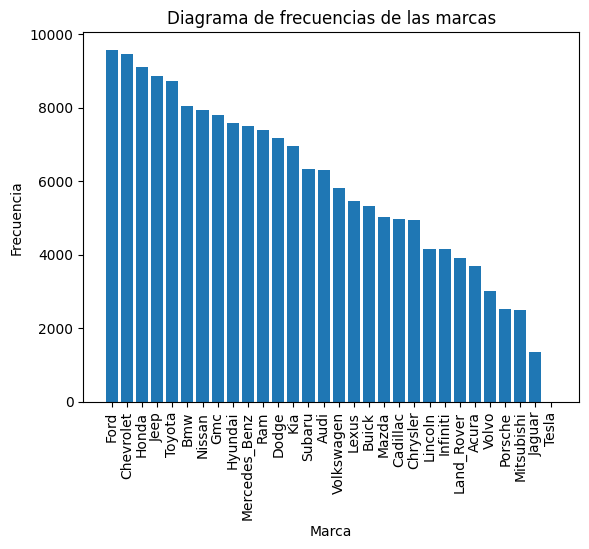

       new&used                                    name  money  \
157929     Used  2019 Tesla Model 3 Standard Range Plus  32999   
157930      New           2023 Toyota Corolla Hybrid Le  31561   
157931      New             2023 Toyota Tundra Platinum  65469   
157932      New              2023 Toyota Highlander Xse  47792   
157933      New         2023 Toyota Tacoma Trd Off Road  39141   
...         ...                                     ...    ...   
166641     Used                 2012 Toyota Sequoia Sr5  13995   
166642     Used                    2012 Toyota Camry Se  12490   
166643     Used                 2012 Toyota Tacoma Base  17999   
166644     Used          2012 Toyota Highlander Limited  18500   
166645     Used                 2012 Toyota Prius V Two  12549   

                   Exterior color   Interior color Drivetrain     MPG  \
157929         Pearl White Multi    White / Black         Rwd     NaN   
157930   Midnight Black Metallic               NaN        Fwd

In [ ]:
# Respuesta

# ahora vamos a necesitar matplotlib; importamos siguiendo la convención

import matplotlib.pyplot as plt

# para mostrar la cantidad de coches por marca utilizamos <value_counts>
# creamos la variable <marca>, entre corchetes pasamos la columna de interés
# e imprimimos cuántos coches tiene cada marca, seguimos la info. de la documentación
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#:~:text=matplotlib.pyplot.bar(,%23

marca = cars["brand"].value_counts()
print(marca)

print()
print()

# para el primer argumento pasamos las filas, para el segundo, la frencuencia
# es decir, las marchas de los coches, y el número de coches por marca

plt.bar(marca.index, marca.values)
plt.xlabel("Marca")
plt.ylabel("Frecuencia")
plt.title("Diagrama de frecuencias de las marcas")
plt.xticks(rotation=90)
plt.show()

# otra forma de hacerlo utilizando el método <plot> de pandas, esto es:
# cars["brand"].value_counts().plot(kind="bar")
# plt.show()

# ahora vamos a crear un "df" con las marcas Toyota y Tesla
# la forma más sencilla es utilizar el método <isin> de pandas
# lo que hacemos es filtrar el "df" y devolver el resultado si, en este caso,
# es verdadero que Toyota y Tesla existen
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html

df_interest = cars[cars["brand"].isin(["Toyota","Tesla"])]

print(df_interest)

print(type(df_interest))

print()

# mostramos solamente la marca Tesla, lo hacemos con un filtrado de "pandas"
# en el que solicitamos del conjunto de datos <df_interest> que nos muestre
# la marca "Tesla" en la columna "brand", esto se explica en el curso de
# DataCamp "Data Manipulation with pandas", aunque en este "blog" es incluso
# más simple de comprender:
# https://blog.hubspot.com/website/filter-rows-pandas
# y aquí en la documentación de Pandas oficial:
# https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html

tesla = df_interest[df_interest["brand"] == "Tesla"]

print(tesla)

print()

# mostramos las últimas tres filas del nuevo "df" con la función <tail>
# no obstante, antes comprobamos sus dimensiones con la función <shape>
# en la documentación se añade una "n=" para <tail>, aunque funciona sin,
# lo mismo que sucede con la función <head()>
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html

print("El número de filas y columnas:")
print(df_interest.shape)

print()

print("Estas son las tres últimas filas:")

print(df_interest.tail(n=3))





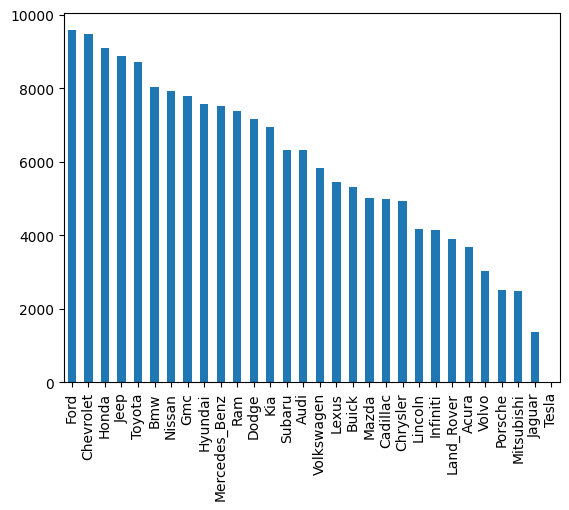

In [ ]:
# otra forma de crear el gráfico, quizás más intuitiva y directa, aunque
# con diferencias estéticas evidentes

cars["brand"].value_counts().plot(kind="bar")
plt.show()

# Ejercicio 2

El tipo de datos, el manejo de los valores NaN y los valores atípicos (outliers o anómalos) son aspectos fundamentales en el procesamiento y análisis de datos.

a) La variable "Accidents or damage" indica si el vehículo ha tenido un accidente. Como hemos visto en el análisis del ejercicio anterior, es de tipo 'object'. Contesta a las preguntas y realiza las siguientes operaciones :
- ¿Cuál consideras que debería ser el tipo de esta variable? ¿Y por qué?
- Obtén los valores únicos de la columna "Accidents or damage".
- ¿Cómo se debería tratar los valores faltantes en esta situación?
- Trata los valores nulos de esta variable.
- Transfórmala para que sea del tipo más conveniente.
- Vuelve a mostrar el tipo de dato y los valores únicos que tiene esta variable actualmente.

 <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 2px; ">NM</span>

In [ ]:
# Respuesta


# primero, veamos el estado del "df" para tener una foto general de los datos

print("El total de nulos es: ", cars["Accidents or damage"].isna().sum())

print()

# esta variable debería ser de tipo numérica, expliquemos el porqué:
# teniendo en cuenta que la labor de un científico de datos pasa también por,
# inferir una serie de datos a partir de otros que no siempre están ordenados,
# esta columna, bien "limpia" podría ser de utilidad para trabajar con
# algoritmos de aprendizaje automático y así crear modelos eficientes
# esto significa que cuanto consistente sea la información, mejor
# así que todo lo que no sea "ha tenido daños"(1), "no ha tenido daños" (0)
# complicaría una supuesta predicción de datos, ya que los algoritmos no podrían
# llevar a cabo bien esta labor con respuestas del tipo no numéricas
# pensemos en los conjuntos de datos que ya hemos utilizado, véase "Spotify",
# o "YouTube", cómo podríamos mejorar el sistema de recomendaciones a partir de
# variables del tipo "me hace sentir bien", "canción maravillosa", etc., si no
# convertimos a números variables como "valence", "danceability", etc.
# con este cambio de datos, sí podrían ser utilizados, por ejemplo, por una
# compañía de seguros o un taller para mejorar sus expectivas de negocio,
# o lo que estimen oportuno según sus necesidades

print("Los valores únicos son:", cars["Accidents or damage"].unique())
print()

# los valores faltantes podrían tratarse con el método <fillna> de pandas,
# que lo que hace es rellenar los valores faltantes con lo que le indiquemos
# https://www.w3schools.com/python/pandas/ref_df_fillna.asp

# para poder ver los valores originales hemos tenido que crear una copia
# del "df" original, de lo contrario, se imprimía todo el tiempo la versión
# corregida con <fillna>, esto lo hacemos con el método <copy> de pandas

cars_copy = cars.copy()

# aplicamos <fillna> a la copia, <inplace = True> lo usamos para guardar la info.

cars_copy["Accidents or damage"].fillna(0, inplace = True)

# podemos ver impreso el antes y el después de aplicar <fillna>

print("Los valores únicos después de fillna son:", cars_copy["Accidents or damage"].unique())

print()

# ahora necesitamos asignar a los valores los números 0 (no), y 1 (sí) para
# tener en esta columna solamente dos posibilidades en vez de cadenas de texto
# podríamos haber asignado un "-1" u otro número, pero me ha parecido más
# conveniente asignar "1" a todo lo que sí está reportado, y un "0" a todo lo
# que no, independientemente de si fue reportado o contiene "nan"
# se puede hacer algo similar con scikit, pero el proceso es algo más "familiar"
# con "pandas" debido al uso de diccionarios que ya conocemos de otras prácticas
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
# https://scikit-learn.org/stable/modules/preprocessing.html#normalization:~:text=Often%20features%20are,0.%2C%201.%2C%201.%5D%5D)
# recordemos además que "If the implementation is hard to explain, it's a bad idea."
# así que, por el momento, esta es la forma en la que sabría explicarlo

cars_copy["Accidents or damage"].replace({"At Least 1 Accident Or Damage Reported": 1, "Yes": 1, "None Reported": 0, "nan": 0}, inplace=True)

# convertimos al tipo de datos que más nos conviene

cars_copy["Accidents or damage"] = cars_copy["Accidents or damage"].astype(int)

print("Valores únicos después de fillna y cambiar el tipo de dato:", cars_copy["Accidents or damage"].unique())

print()

print("Ahora el tipo de dato es: ",cars_copy["Accidents or damage"].dtypes)

El total de nulos es:  52574

Los valores únicos son: [nan 'None Reported' 'At Least 1 Accident Or Damage Reported' 'Yes']

Los valores únicos después de fillna son: [0 'None Reported' 'At Least 1 Accident Or Damage Reported' 'Yes']

Valores únicos después de fillna y cambiar el tipo de dato: [0 1]

Ahora el tipo de dato es:  int64


b) Eliminar los valores anómalos es un punto clave para el procesamiento de los datos para obtener un dataset de mayor calidad. Observad las estadísticas básicas de las variables numéricas y sustituid por NaNs los valores anómalos que podáis identificar. Comprobad que las variables numéricas ya no contienen estos valores anómalos después de la modificación.

**(1 punto)** <span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">EI</span>

In [ ]:
# Respuesta

# vamos a necesitar <numpy> para este ejercicio

import numpy as np

# observamos que en la columna "Mileage" tenemos un valor de "-188773.000000"
# y que en la columna "Year" el año "1855" y un valor "max = 6020"
# vamos a utilizar el método <loc> de "pandas" para localizar estos datos,
# similar a <iloc>, pero que busca por el nombre de columna "label"
# las operaciones de filtrado ya las hemos trabajado anteriormente con la pec
# de las canciones de "Spoty", así que más o menos se trata de copiar lo hecho
# como podemos comprobar, en la nueva descripción hemos eliminado los tres
# valores que habíamos detectado

cars.loc[cars["Mileage"] < 0, "Mileage"] = np.nan

cars.loc[(cars["Year"] < 1886) | (cars["Year"] > 2023), "Year"] = np.nan

# imprimimos todo de nuevo para que se vea en contexto

print(cars.describe())


              money        Mileage           Year
count  1.754900e+05  175440.000000  175488.000000
mean   3.435422e+04   51194.092117    2018.551975
std    2.350952e+04   43348.625572       3.136934
min    1.895000e+03       0.000000    2012.000000
25%    1.999100e+04   15169.750000    2016.000000
50%    2.899000e+04   44328.000000    2019.000000
75%    4.199000e+04   78482.500000    2021.000000
max    2.200000e+06  763474.000000    2023.000000


In [ ]:
# volvemos a imprimir la cantidad de valores nulos para comprobar que los resultados
# difieren de la llamada en el ejercicio 1, dicho de otra forma, hemos creado
# valores "nan" y podríamos saber cuántos

print(cars.isnull().sum())


new&used                    0
name                        0
money                       0
Exterior color           1892
Interior color          14896
Drivetrain                556
MPG                     32084
Fuel type                1343
Transmission              764
Engine                    332
Mileage                    50
Convenience             29933
Entertainment            8907
Exterior                16908
Safety                   1942
Seating                 57654
Accidents or damage     52574
Clean title            157340
1-owner vehicle         52799
Personal use only       52575
brand                       0
Year                        2
Model                       0
currency                    0
dtype: int64


# Ejercicio 3


En el directorio `data` encontraréis un fichero con un conjunto de datos de indicadores de salud de la diabetes. Estos datos contienen estadísticas de atención médica e información de encuestas sobre el estilo de vida de las personas en general junto con su diagnóstico de diabetes. También encontraréis datos demográficos, resultados de pruebas de laboratorio y respuestas a preguntas de encuestas para cada paciente. La variable objetivo para la clasificación es si un paciente tiene diabetes, es prediabético o está sano.

Podéis encontrar la fuente de los datos en [UCI](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators), donde encontraréis una descripción detallada de las variables.

a) Muesta las primeras 5 entradas, lista los nombres de  las variables y muestra el total filas del dataset. Comprueba que no hay NA en ningúna de las variables y borra las filas duplicadas.

 <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 2px; ">NM</span>


In [ ]:
# Respuesta

import pandas as pd

# cargamos los datos y mostramos las primeras cinco entradas con <head()>

diab = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/prog_datasci_6/data/diabetesp.csv")

print("Estas son las 5 primeras entradas: \n\n",diab.head(n=5))

# vamos a ver la lista de las variables, o sea, de las columnas

print("Aquí tenemos el nombre de las variables:\n\n",diab.columns)

# el total de filas del "df"

print("Total de filas es: ",len(diab))

print()

print("Alternativa con <shape>: ",diab.shape)

print()

# comprobamos si existen o no valores <nan> en el conjunto de datos
# el resultado muestra que no: <False>

print(diab.isna().any())

# para borrar las filas duplicadas utilizaremos <drop_duplicates> de "pandas"
# aplicamos <inplace=True> para guardar, como anteriormente, los cambios

drop_dupli = diab.drop_duplicates(inplace=True)


# comprobamos si hay duplicados

print("El total de duplicados es: ",diab.duplicated().sum())



Estas son las 5 primeras entradas: 

    Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0    

b) Calcula los siguientes valores estadísticos: media aritmética, máximo, mínimo, cuartiles (25%,50% y 75%) y desviación típica de todas las variables del dataframe por sexo para las variables de diagnóstico de diabetes, índice de masa corporal, fumar, edad, educación y ingreso.


 <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 2px; ">NM</span>

In [ ]:
# Respuesta

# para calcular los estadísticos vamos a utilizar el método <describe()>
# acudimos a la página CDC Diabetes Health Indicators y revisamos la descripción
# de las variables, a continuación agrupamos por las columnas que se nos pide
# esto lo hacemos creando una lista con la variables que pasamos a <groupby>
# probamos primero con todas las columnas, pero Python nos avisa de que
# se tiene que hacer mejor con una lista, imprimimos las estadísticas
# para la variable <stat>
# en una celda más abajo lo imprimimos como "string" para mayor claridad

variables = ["Diabetes_012", "BMI", "Smoker", "Age", "Education", "Income"]
stat = diab.groupby("Sex")[variables].describe()
print(stat)

    Diabetes_012                                                   BMI  \
           count      mean      std  min  25%  50%  75%  max     count   
Sex                                                                      
0.0     128854.0  0.304950  0.70477  0.0  0.0  0.0  0.0  2.0  128854.0   
1.0     100927.0  0.352027  0.74838  0.0  0.0  0.0  0.0  2.0  100927.0   

                ... Education         Income                                \
          mean  ...       75%  max     count      mean       std  min  25%   
Sex             ...                                                          
0.0  28.499550  ...       6.0  6.0  128854.0  5.647283  2.155428  1.0  4.0   
1.0  28.923291  ...       6.0  6.0  100927.0  6.200749  1.966043  1.0  5.0   

                    
     50%  75%  max  
Sex                 
0.0  6.0  8.0  8.0  
1.0  7.0  8.0  8.0  

[2 rows x 48 columns]


In [ ]:
# lo ponemos aquí un poco más claro con el método de pandas <to_string>
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_string.html

print(stat.to_string())

    Diabetes_012                                                   BMI                                                       Smoker                                                    Age                                                Education                                                 Income                                             
           count      mean      std  min  25%  50%  75%  max     count       mean       std   min   25%   50%   75%   max     count      mean       std  min  25%  50%  75%  max     count      mean       std  min  25%  50%   75%   max     count      mean       std  min  25%  50%  75%  max     count      mean       std  min  25%  50%  75%  max
Sex                                                                                                                                                                                                                                                                                                                     

c) Realiza las siguientes operaciones:
- Tipifica (normaliza) la variable de índice de masa corporal y añadela al data frame con nombre `zBMI`
- Comprueba para la variable tipificada tiene media nula y desviación estándar unitaria, indica si el resultado es correcto o no
- Discretiza la variable tipificada  en tres cuantiles de forma que tengamos el un número similar  de muestras por quantil en una nueva variable `dBMI` (mira la documentación de de las funciones de pandas)
- Calcula el valor medio del  índidice de masa corporal  y la edad para cada tipo de `dBMI`

**Nota**: Consultad el siguiente [artículo](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35) para ver la importancia de la estandarización de los datos en el rendimiento de los algoritmos de aprendizaje automatizado.


<span style="fuente-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span> **(1 punto)**


In [ ]:
# Respuesta

import pandas as pd
from sklearn.preprocessing import StandardScaler

# para tipificar (normalizar) la variable de índice de masa corporal utilizamos
# la fución <StandardScaler> tal y como se muestra en el material de estudio
# también existe una opción en scipy llamada <z.score>
# aquí lo que hacemos, en la parte izquierda, es crear a partir del <diab>, que
# es nuestro conjunto de datos, una columna llamada "zBMI", cuyo valor estará
# normalizado, a continuación mostramos las estadísticas básicas

diab["zBMI"] = StandardScaler().fit_transform(diab[["BMI"]])

print(diab["zBMI"].describe())
print()

# Comprobamos si la variable tipificada tiene media nula y desviación estándar unitaria

print("Media de zBMI:", diab["zBMI"].mean())
print()

print("Desviación estándar de zBMI:", diab["zBMI"].std())
print()

# Discretizamos la variable tipificada en tres cuantiles con la función
# <pd.qcut>, que divide los datos en grupos de varios tamaños:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html
# la duda era si debíamos utilizar la función <cut> como en el material de estudio
# según parece, esta es la forma correcta de hacerlo
# https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
# más o menos se trata de repetir la operación de arriba con <zBMI> pero en
# con una nueva variable, en este caso que va a discretizar <zBMI> en 3 cuantiles

diab["dBMI"] = pd.qcut(diab["zBMI"], q=3, labels=False)

# calculamos ahora el valor medio del índice de masa corporal
# añadimos la edad para cada tipo de <dBMI>

media_BMI_dBMI = diab.groupby("dBMI")["BMI"].mean()
media_Age_dBMI = diab.groupby("dBMI")["Age"].mean()

print("\nValor medio del índice de masa corporal por dBMI:")
print(media_BMI_dBMI)

# se mostrará la información por grupos de edad, como hemos dividido en 3
# cuantiles, se mostrará: 0, 1, 2

print("\nValor medio de la edad por dBMI:")
print(media_Age_dBMI)

# a tenor de lo que he podido encontrar, los datos son correctos, es decir,
# la media está próxima a 0 y la desviación estándar unitaria a 1
# https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35#:~:text=Normalization%20is%20used,X%2DY%20plane.
# también existe en DataCamp abundante información sobre esta cuestión a la que
# llaman "feature engineering" ("scaling and transformation")
# https://campus.datacamp.com/courses/feature-engineering-for-machine-learning-in-python/conforming-to-statistical-assumptions?ex=5
# también se puede consultar a través de O'Reilly el libro:
# "Hands on Machine Learning with Scikit-Learn, Keras and TensorFlow"

count    2.297810e+05
mean    -1.935755e-16
std      1.000002e+00
min     -2.458712e+00
25%     -6.904556e-01
50%     -2.483915e-01
75%      4.883821e-01
max      1.021379e+01
Name: zBMI, dtype: float64

Media de zBMI: -1.93575514331395e-16

Desviación estándar de zBMI: 1.0000021759920619


Valor medio del índice de masa corporal por dBMI:
dBMI
0    22.600880
1    27.798921
2    36.238672
Name: BMI, dtype: float64

Valor medio de la edad por dBMI:
dBMI
0    8.067640
1    8.298118
2    7.865448
Name: Age, dtype: float64


In [ ]:
# comprobamos si están las columnas nuevas
diab.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'zBMI', 'dBMI'],
      dtype='object')

d) - Representa graficamente el histograma de la Edad estratificada función de la variable discretizada.  Repite la gráfica en función del código de diabetes.

 <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 2px; ">NM</span>

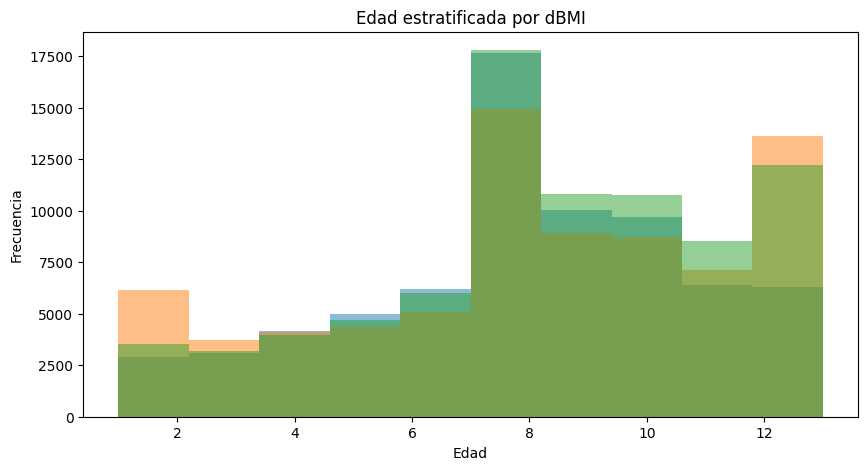

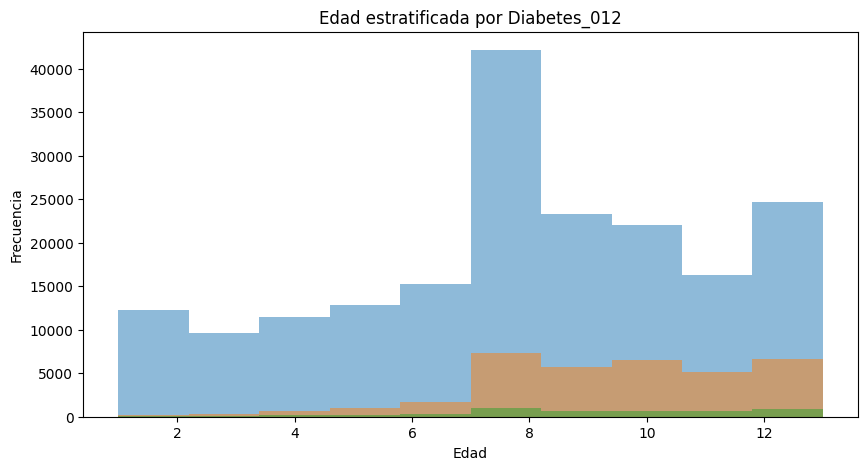

In [ ]:
# Respuesta

import matplotlib.pyplot as plt

# Primero, vamos a hacer el histograma de Edad estratificada por dBMI

plt.figure(figsize=(10, 5))
for i in diab["dBMI"].unique():
    # Para cada valor de dBMI, creamos un histograma de la Edad
    plt.hist(diab[diab["dBMI"] == i]["Age"], alpha=0.5)
plt.title("Edad estratificada por dBMI")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Ahora, vamos a hacer el histograma de Edad estratificada por Diabetes_012

plt.figure(figsize=(10, 5))
for i in diab["Diabetes_012"].unique():
    # Para cada valor único en Diabetes_012, hacemos un histograma de la Edad
    plt.hist(diab[diab["Diabetes_012"] == i]["Age"], alpha=0.5)
plt.title("Edad estratificada por Diabetes_012")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


Ejercicio 4
=======

Vamos a evaluar diferentes estrategias para la imputación de datos faltantes en las variables `BMI`, `Age`, `Income`, `GenHlth`, `MentHlth` i `PhysHlt`, puedes seguir estos pasos:

a) Crea un número aleatorio de valores perdidos en las variables especificadas, cubriendo el 20% de los valores. Comprueba que el porcentage de valores perdidos por variable coincide con el 20%. Guarda una copia del dataset original (sin valores perdidos) en `original_df`.

**(1 punto)**  <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 2px; ">NM</span>

In [ ]:
# Respuesta

import pandas as pd
import numpy as np

# Guardamos en la variable <original_df> una copia de <diab>

original_df = diab.copy()

# creamos una lista con las columnas en las que introduciremos los valores perdidos
# una vez completado el resto del código nos damos cuenta de un error en la
# descripción del nombre de la columna PhysHlth en el enunciado del ejercicio
# falta una "h" al final de la palabra, algo que hace que obtengamos un error;
# esto nos sirve, de paso, para observar el comportamiento de Python al
# introducir un nombre con un error tipográfico
# detectamos este error tras comprobar que el porcentaje no cuadra
# abajo, enlazamos la fuente: "PhysHlt" del enunciado vs "PhysHlth", el correcto:
# https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators#:~:text=PhysHlth,scale%201%2D30


cols = ["BMI", "Age", "Income", "GenHlth", "MentHlth", "PhysHlth"]

# creamos ahora un número aleatorio valores perdidos en <cols>, de paso,
# crearemos una semilla para que el código por cuestiones de reproducibilidad
# como tenemos que introducir un 20% de valores "nan" en estas columnas, vamos
# a crear un bucle que recorra las columnas de <cols> al tiempo que selecciona
# de cada columna con la función <sample> un 20% aleatoriamente en el que
# introducir valores "nan", algo que haremos al final del bucle con <np.nan>
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
# https://numpy.org/doc/stable/reference/constants.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

np.random.seed(0)

for col in cols:
    diab.loc[diab.sample(frac=0.2).index, col] = np.nan

# comprobamos si hemos introducido el porcentaje de valores perdidos por columna
# creamos otro bucle en el que la variable <missing> comprobará el porcentaje
# de valores perdidos en cada columna, esto lo hacemos pidiendo a Python si
# existen valores "nan", obteniendo el porcentaje de "True" por columna
# podríamos escribor el bucle en una sola línea, pero lo separo porque entendemos
# que es más fácil de desglosar, explicar o entender de esta forma, en vez de
# leer algo así: <format(col, diab[col].isna().mean() * 100))>

for col in cols:
    missing = diab[col].isna().mean() * 100
    print("El porcentaje de valores perdidos en {} es: {:.2f}%".format(col, missing))


El porcentaje de valores perdidos en BMI es: 20.00%
El porcentaje de valores perdidos en Age es: 20.00%
El porcentaje de valores perdidos en Income es: 20.00%
El porcentaje de valores perdidos en GenHlth es: 20.00%
El porcentaje de valores perdidos en MentHlth es: 20.00%
El porcentaje de valores perdidos en PhysHlth es: 20.00%


b)  Seleccionar tres políticas para la imputación de datos faltantes mediante el método `SimpleImputer` del paquete [scikit-learn](https://scikit-learn.org/stable/).
Calcular el rendimiento de cada política de imputación para cada variable en términos de Root Mean Square Error.



<span style="fuente-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span>

In [ ]:
# Respuesta

from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# aquí creamos las tres estrategias de imputación, lo que quiere decir es que
# sustituimos estos valores "nan" por una medida que puede ser la media, etc.,
# sería una forma de rellenar los datos teniendo en cuenta las tendencias estadísticas
# en este caso utlizaremos la media, la mediana y el valor más frecuente

imput_mean = SimpleImputer(strategy="mean")
imput_median = SimpleImputer(strategy="median")
imput_most_frequent = SimpleImputer(strategy="most_frequent")

diab_mean = imput_mean.fit_transform(diab)
diab_median = imput_median.fit_transform(diab)
diab_most_frequent = imput_most_frequent.fit_transform(diab)

# en esta parte del ejercicio validamos el rendimiento
# [afortunadamente recordé el curso "introduction to machine learning" de Kaggle]
# https://www.kaggle.com/code/dansbecker/model-validation
# https://www.kaggle.com/learn/certification/miguelabcn/intro-to-machine-learning

rmse_mean = mean_squared_error(original_df, diab_mean, squared=False)
rmse_median = mean_squared_error(original_df, diab_median, squared=False)
rmse_most_frequent = mean_squared_error(original_df, diab_most_frequent, squared=False)

print("RMSE para la imputación de la media: {}".format(rmse_mean))
print("RMSE para la imputación de la mediana: {}".format(rmse_median))
print("RMSE para la imputación del valor más frecuente: {}".format(rmse_most_frequent))

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html


RMSE para la imputación de la media: 0.5552680310353278
RMSE para la imputación de la mediana: 0.5960638856583911
RMSE para la imputación del valor más frecuente: 0.6163999498545687


c) Imputar los datos con valores perdidos con la mejor política para vada variable y crear un dataframe llamado `df`. Compruebe que no hay valores perdidos para cada variable


**(1 punto)**  <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 2px; ">NM</span>

In [ ]:
# Respuesta

# vamos a recapitular para ver todo el mapa completo


# Para el dataframe original "original_df"

print("Valores perdidos en <original_df>, que es copia del original:\n")
print(original_df.isnull().sum())

print()

# valores perdidos para <diab>

print("Valores perdidos en <diab> tras introducir el 20%:\n")
print(diab.isnull().sum())

print()

# ahora sí, definimos las estrategias de imputación según nos conviene
# en este caso, hemos visto que la media tiene un valor menor RMSE, de modo que
# escogemos la media para los valores numéricos, y el valor más frecuente para
# las columnas categóricas tal y como se sugiere a continuación:
# https://scikit-learn.org/stable/modules/impute.html#:~:text=Note%20that%20this,when%20using%20the
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer:~:text=strategystr%2C%20default,The%20imputation%20strategy.
# en el caso del valor más frecuente parece razonable escoger esta estrategia
# al tratarse de un valor (respuesta) correspondiente a una pregunta sobre
# la autopercepción de salud de una persona, es decir, estamos sustituyendo
# valores perdidos con la autopercepción de salud más reportada por los sujetos

imput_mean = SimpleImputer(strategy="mean")
imput_most_frequent = SimpleImputer(strategy="most_frequent")

# Definimos las columnas para cada estrategia en función de si son numéricas
# o categóricas (esto lo recomiendan en la docu oficial, enlazar)
cols_mean = ["BMI", "Age", "Income"]
cols_most_frequent = ["GenHlth", "MentHlth", "PhysHlth"]

# Aplicamos las estrategias a las columnas correspondientes

diab[cols_mean] = imput_mean.fit_transform(diab[cols_mean])
diab[cols_most_frequent] = imput_most_frequent.fit_transform(diab[cols_most_frequent])

# Comprobamos si hay valores perdidos
print("Valores perdidos tras finalizar el proceso:\n")
print(diab.isnull().sum())



Valores perdidos en <original_df>, que es copia del original:

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
zBMI                    0
dBMI                    0
dtype: int64

Valores perdidos en <diab> tras introducir el 20%:

Diabetes_012                0
HighBP                      0
HighChol                    0
CholCheck                   0
BMI                     45956
Smoker                      0
Stroke                      0
HeartDiseaseorAttack        0
PhysAct